# Define paramters

In [18]:
import numpy as np 
#import tensorflow as tf
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import os
from os import environ
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization


location = "/User/.keras/datasets/cats_and_dogs_filtered/"
#saved_model_path = tf.contrib.saved_model.save_keras_model(model, "./saved_models")
saved_model = "./model.h5"
#print(os.listdir(location))

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color




version = '1.0'
#environ['MODEL_FILE'] = 'saved_model.pb'.format(version)
environ['MODEL_FILE'] = 'saved_model.pb'

image_size = 160 # All images will be resized to 160x160
IMG_SHAPE = (image_size, image_size, 3)
batch_size = 32



# Create and Load Model and setup handeler 

Found 1 images.
1
                                            filename  probability  category
0  /User/.keras/datasets/cats_and_dogs_filtered/c...     0.561173         1


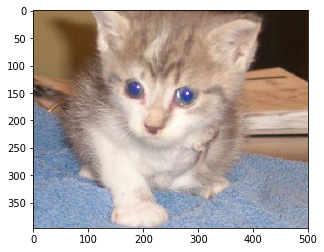

In [54]:

# Returns a short sequential model
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  
    return model

def handler(model, event):
    #image_url = event.decode('utf-8').strip()
    image_url = load_img(event)
    plt.imshow(image_url)
    
    
    test_filenames = [event] # traslate evet to filename
    
    test_df = pd.DataFrame({
        'filename': test_filenames
    })
    nb_samples = test_df.shape[0]   
    
    
    
    test_gen = ImageDataGenerator(rescale=1./255)
    test_generator = test_gen.flow_from_dataframe(
        test_df, 
        location + "/validation/", 
        x_col='filename',
        y_col=None,
        class_mode=None,
        target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False
    )
    print (nb_samples)
    predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
    threshold = 0.5
    test_df['probability'] = predict
    test_df['category'] = np.where(test_df['probability'] > threshold, 1,0)
    return test_df



model = create_model()
model.load_weights(saved_model)
#model.summary()
sample = random.choice(os.listdir(location+"/cats_n_dogs"))
image = location+"cats_n_dogs/"+sample #temp to get a file 

output = handler(model, image)
print(output)




